# Compare OSM networks using osmnx package in the python environment

Boeing, Geoff. ‘OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks’. Computers, Environment and Urban Systems 65 (September 2017): 126–39. https://doi.org/10.1016/j.compenvurbsys.2017.05.004.

- drive: get drivable public streets (but not service roads) 
- drive_service: get drivable public streets including service roads
- walk: get all streets and paths that pedestrians can use (this network type ignores one-way directionality by always connecting adjacent nodes with reciprocal directed edges)

Tag:highway=service
https://wiki.openstreetmap.org/wiki/Tag:highway%3Dservice

In [2]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.16.0'

In [3]:
# radius in meters(approx 1 miles)
dist = 2*805 

In [4]:
# define centre point for location
places = [
    ['islington', (51.545487, -0.099821), 'drive_service'], 
    ['islington', (51.545487, -0.099821), 'walk'], 
    ['islington', (51.545487, -0.099821), 'drive'],
    ['hounslow', (51.447634,-0.404684), 'drive_service'], 
    ['hounslow', (51.447634,-0.404684), 'walk'], 
    ['hounslow', (51.447634,-0.404684), 'drive'],
    ['derby', (52.916687,-1.489641), 'drive_service'], 
    ['derby', (52.916687,-1.489641), 'walk'], 
    ['derby', (52.916687,-1.489641), 'drive'], 
]

In [16]:
# create an 'images' folder to store png
# configure the inline image display
img_folder = 'images'
extension = 'png'
dpi = 40


['islington', (51.545487, -0.099821), 'drive_service']


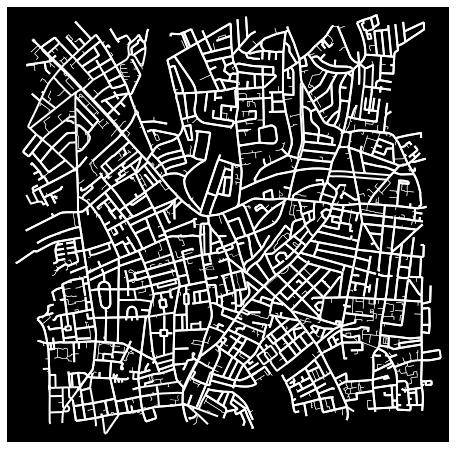

['islington', (51.545487, -0.099821), 'walk']


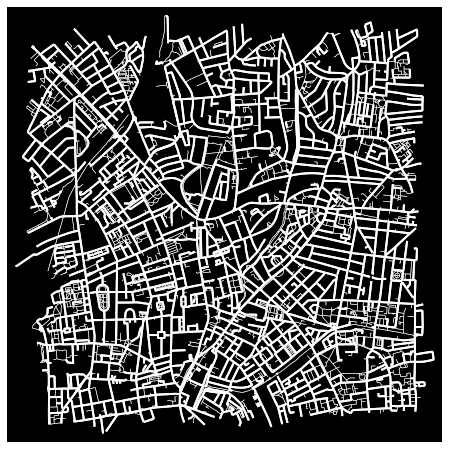

['islington', (51.545487, -0.099821), 'drive']


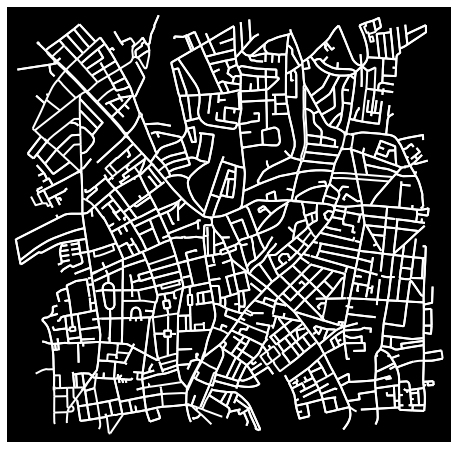

['hounslow', (51.447634, -0.404684), 'drive_service']


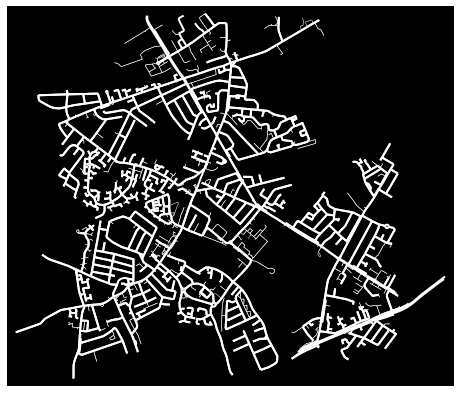

['hounslow', (51.447634, -0.404684), 'walk']


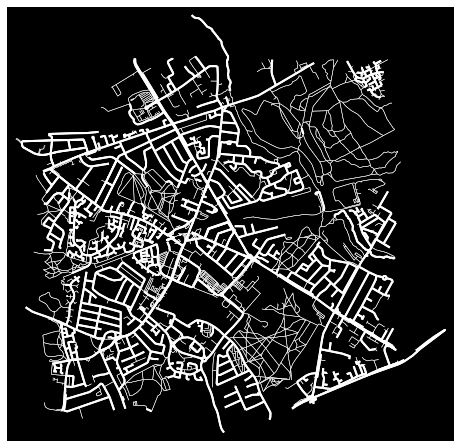

['hounslow', (51.447634, -0.404684), 'drive']


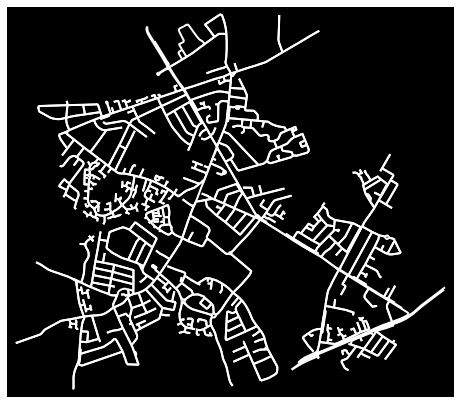

['derby', (52.916687, -1.489641), 'drive_service']


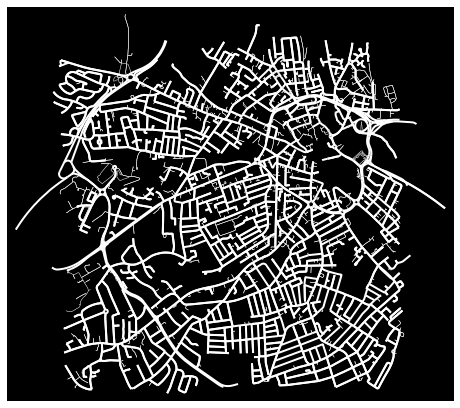

['derby', (52.916687, -1.489641), 'walk']


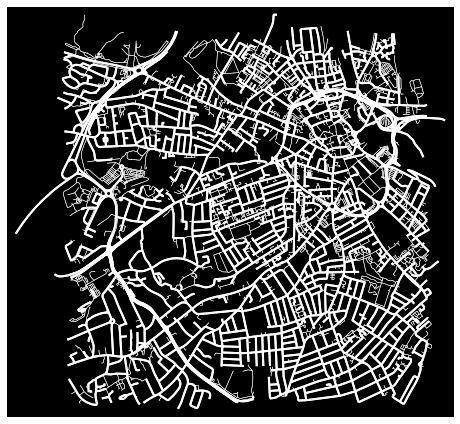

['derby', (52.916687, -1.489641), 'drive']


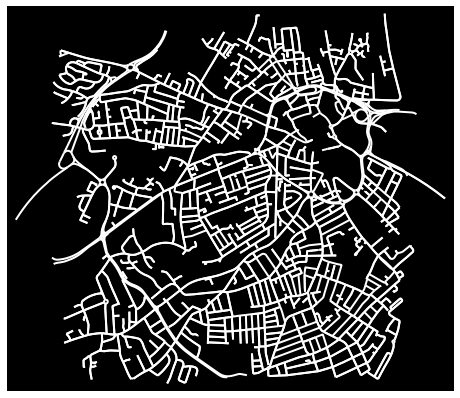

In [18]:
for plot_num, place in enumerate(places):
    print(place)
    name, point, nt = place
    G = ox.graph_from_point(point, dist=dist, network_type=nt, truncate_by_edge=True)
    G = ox.project_graph(G)
    ew = []
    for u, v, key, data in G.edges(keys=True, data=True):
        footway, motorway, other = 0.5, 4, 2
        if name=="hyderabad":
            footway, motorway, other = 0.1, 3, 0.9
        if data['highway'] in ['footway', 'steps', 'pedestrian', 'service', 'footway', 'path', 'track']:
            width = 0.5
        elif data['highway'] in ['motorway']:
            width = 4
        else:
            width = 2
        ew.append(width)
    
    # show and save to file    
    ox.plot_graph(G, node_size=0, edge_linewidth=ew, edge_color='white', bgcolor='#000000',
                  show=True, save=True, filepath=f'./{img_folder}/{place}.{extension}', dpi=dpi)